In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Changing appearance defaults

You've already learned to change properties of plot elements by passing keyword arguments.

However, that can be quite lengthy if you want the same changes everytime.
Instead, you can change default of many visual properties, which are contained in the config dictionary `rcParams`.

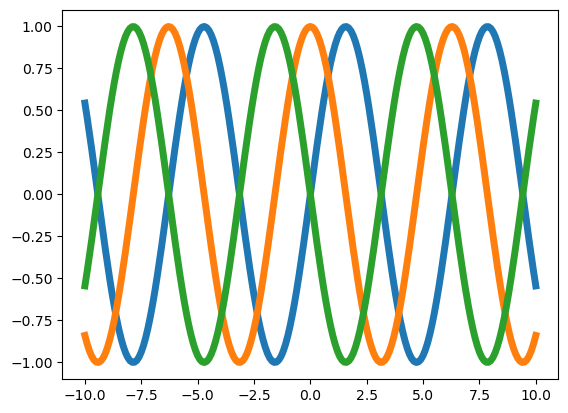

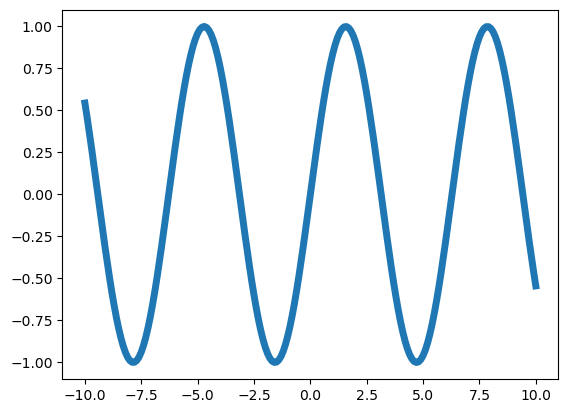

In [2]:
x = np.linspace(-10, 10, 201)

plt.rcParams['lines.linewidth'] = 5  # Not recommended: Changes the global state and thus affects future plots (use a context instead - see below)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(x, -np.sin(x))
plt.show()

#plt.rcParams['lines.linewidth'] = 1.5

plt.plot(x, np.sin(x))

### Excursion: Context-Manager

Context-Managers are an efficient way of handling init/cleanup code patterns:

    initialize_context()
    ...
    arbitrary code
    ...
    cleanup_context()


This can be written as a context:
    
    with [context]:
        arbitrary code


#### Example file reading

    f = open('file.txt')
    try:
        data = f.read()
    finally:
        f.close()

can be written with an open context as:

    with open('file.txt') as f:
        f.read()
    
#### Context for matplotlib rcParams

    with plt.rc_context(param_dict):
        # some plotting

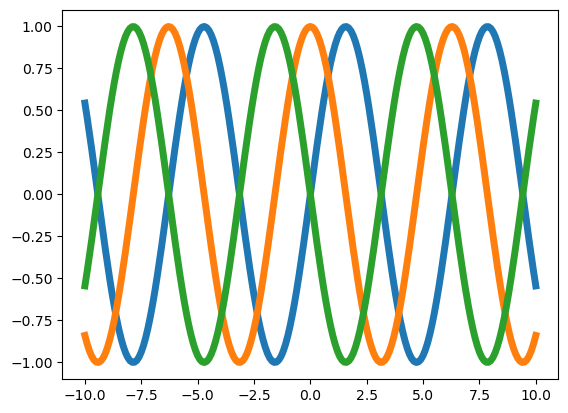

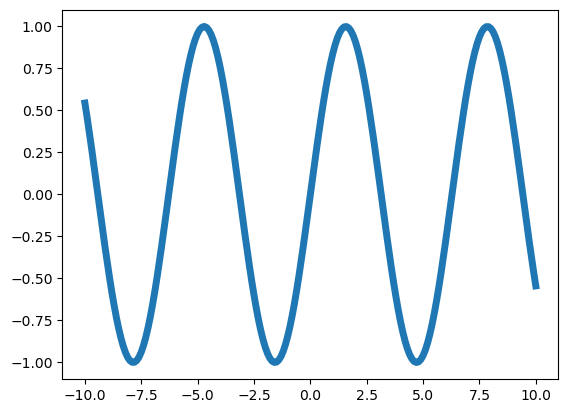

In [3]:
with plt.rc_context({'lines.linewidth': 5}):
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, -np.sin(x))
    plt.show()

plt.plot(x, np.sin(x))

`rcParams` are a global setting. Modify them directly only when your code owns the global state; i.e.

- OK: Adapt `rcParams` at the top of a notebook
- bad: Adapt `rcParams` in a plotting function
- very bad: Adapt `rcParams` in a library

So, don't do this:

~~~
def myplot(x, y):
    rcParams['lines.linewidth'] = 5
    fig, ax = plt.subplots()
    ax.plot(x, y)
~~~

do this instead:

~~~
def myplot(x, y):
    with plt.rc_context({'lines.linewidth': 5}):
        fig, ax = plt.subplots()
        ax.plot(x, y)
~~~


## Available rcParams

In [4]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

You can use `rcParams.find_all()` to display the subset of parameters matching a string.

In [5]:
plt.rcParams.find_all('marker')

RcParams({'boxplot.flierprops.marker': 'o',
          'boxplot.flierprops.markeredgecolor': 'black',
          'boxplot.flierprops.markeredgewidth': 1.0,
          'boxplot.flierprops.markerfacecolor': 'none',
          'boxplot.flierprops.markersize': 6.0,
          'boxplot.meanprops.marker': '^',
          'boxplot.meanprops.markeredgecolor': 'C2',
          'boxplot.meanprops.markerfacecolor': 'C2',
          'boxplot.meanprops.markersize': 6.0,
          'legend.markerscale': 1.0,
          'lines.marker': 'None',
          'lines.markeredgecolor': 'auto',
          'lines.markeredgewidth': 1.0,
          'lines.markerfacecolor': 'auto',
          'lines.markersize': 6.0,
          'markers.fillstyle': 'full',
          'scatter.marker': 'o'})

## Style Sheets

Style sheets are predefined sets of rcParams.

https://matplotlib.org/stable/tutorials/introductory/customizing.html

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

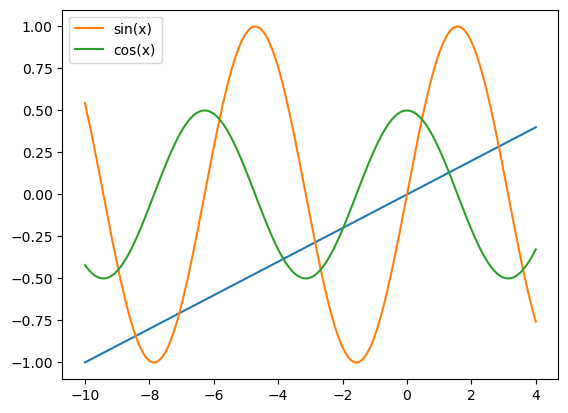

In [7]:
plt.style.use('default')
#plt.style.use('seaborn')
x = np.linspace(-10, 4, 201)
plt.plot(x, 0.1*x)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, 0.5*np.cos(x), label='cos(x)')
plt.legend()

Also styles can be used as context.

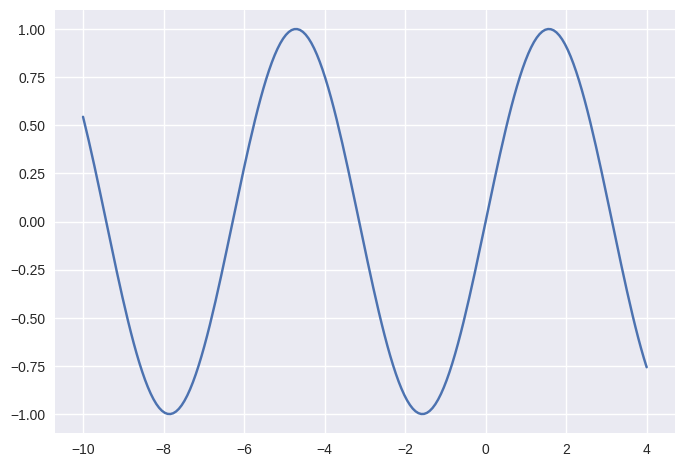

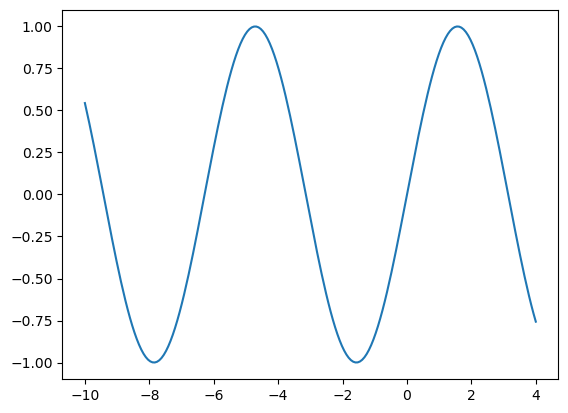

In [8]:
y = np.sin(x)

with plt.style.context('seaborn'):
    plt.plot(x, y)
    plt.show()

plt.plot(x, y)